<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Практика" data-toc-modified-id="Практика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Практика</a></span><ul class="toc-item"><li><span><a href="#ЦПТ-для-различных-распределений" data-toc-modified-id="ЦПТ-для-различных-распределений-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ЦПТ для различных распределений</a></span><ul class="toc-item"><li><span><a href="#Сгенерируйте-примеры-из-распределения" data-toc-modified-id="Сгенерируйте-примеры-из-распределения-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Сгенерируйте примеры из распределения</a></span></li><li><span><a href="#Постройте-гистограмму-выборки-и-теоретическую-плотность-распределения" data-toc-modified-id="Постройте-гистограмму-выборки-и-теоретическую-плотность-распределения-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Постройте гистограмму выборки и теоретическую плотность распределения</a></span></li><li><span><a href="#Оценим-распределение-выборочного-среднего-для-разных-объёмов-выборок" data-toc-modified-id="Оценим-распределение-выборочного-среднего-для-разных-объёмов-выборок-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Оценим распределение выборочного среднего для разных объёмов выборок</a></span></li></ul></li><li><span><a href="#Доверительный-интервал-на-основе-ЦПТ" data-toc-modified-id="Доверительный-интервал-на-основе-ЦПТ-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Доверительный интервал на основе ЦПТ</a></span></li></ul></li></ul></div>

# Практика

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import statsmodels.stats.weightstats as ssw
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine

nakagami_nu = sts.nakagami(nu = 4.97)
sample= nakagami_nu.rvs(1000)
sample

array([1.05650724, 1.08286003, 0.9019456 , 0.7427966 , 0.77129016,
       0.80732322, 0.76275201, 1.3348233 , 1.0315542 , 0.94276431,
       0.76033706, 1.2868151 , 0.95141697, 0.66448995, 0.97165939,
       1.12622078, 0.79265552, 1.23160204, 1.14618205, 0.75776366,
       1.06139863, 1.06060974, 0.64391212, 0.96393482, 1.02283517,
       0.90205429, 0.99533731, 1.07530537, 1.13522221, 0.78740223,
       0.79034481, 0.79044012, 0.87826902, 0.66840689, 0.84860213,
       0.74083764, 0.93286168, 1.15253718, 0.66126368, 0.97046386,
       0.48367716, 1.33860345, 1.15685555, 1.25027229, 0.97290501,
       1.06189737, 1.11829533, 0.79908902, 0.66788928, 1.04413259,
       1.01059114, 0.70161716, 0.72108287, 1.04220947, 1.18971518,
       1.86170609, 0.84657417, 0.91945891, 1.12895644, 1.07816929,
       0.86812995, 1.07520983, 0.93895443, 0.89534739, 0.79810129,
       0.76889066, 0.87498534, 0.88606006, 0.35726211, 1.35520998,
       0.79400971, 0.80069105, 0.89510155, 0.90727145, 1.23854

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = nakagami_nu.mean() # настоящее среднее случайной величины
real_mean

0.9752036285923569

In [5]:
real_var = nakagami_nu.var() # настоящая дисперсия случайной величины
real_var

0.048977882780300463

### Постройте гистограмму выборки и теоретическую плотность распределения

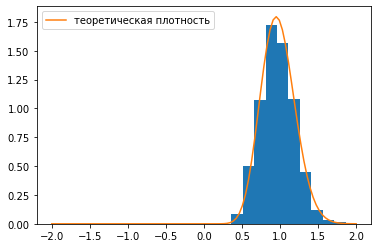

In [88]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-2,2,100)
pdf = nakagami_nu.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=1)
plt.legend();

In [7]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.9631491128050834
0.05025571983940325


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

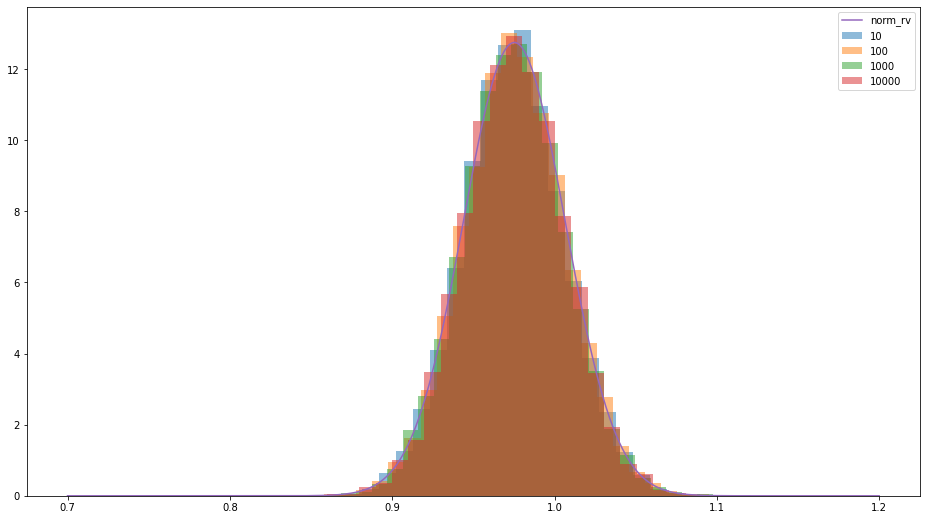

In [108]:
# ваш код тут
plt.figure(figsize=(16,9))
sample_size = [10, 100, 1000, 10000]
for k in sample_size:
    means = []
    for i in range(10000):
        means.append(np.mean(nakagami_nu.rvs(50)))
    plt.hist(means, bins=25, density=True, alpha=0.5)

norm_rv = sts.norm(loc=nakagami_nu.mean(), scale=nakagami_nu.std() / np.sqrt(50))
x = np.linspace(0.7, 1.2, 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, alpha = 1)
plt.legend(['norm_rv', '10', '100', '1000', '10000'])
plt.show();

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

<div class="alert alert-block alert-success">
Чем больше выборка, тем лучше (точнее) работает апроксимация
</div>

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [58]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [76]:
stats = df.groupby(['churn'])['total day calls'].agg(['mean', 'count', 'std', 'var'])
stats

,mean,count,std,var
churn,,,,
False,100.283158,2850,19.801157,392.085817
True,101.335404,483,21.582307,465.795985


In [122]:
ci95_hi = []
ci95_lo = []
stats_1 = pd.DataFrame(index = ['False', 'True'])
for i in stats.index:
    m, c, s, a = stats.loc[i]
    ci95_hi.append(m + 1.96*s/np.sqrt(c))
    ci95_lo.append(m - 1.96*s/np.sqrt(c))
stats_1['ci95_lo'] = ci95_lo
stats_1['ci95_hi'] = ci95_hi

stats_1

,ci95_lo,ci95_hi
False,99.556175,101.010141
True,99.410627,103.260181


In [123]:
print("Доверительный интервал для среднего по цпт интервальная оценка (false): {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(df[df['churn'] == False]['total day calls']), 
                      scale=np.std(df[df['churn'] == False]['total day calls'], ddof=1)/
                      np.sqrt(df[df['churn'] == False]['total day calls'].count()))))
print("Доверительный интервал для среднего по цпт интервальная оценка (true): {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(df[df['churn'] == True]['total day calls']), 
                      scale=np.std(df[df['churn'] == True]['total day calls'], ddof=1)/
                      np.sqrt(df[df['churn'] == True]['total day calls'].count()))))


Доверительный интервал для среднего по цпт интервальная оценка (false): (99.55618833318324, 101.01012745629045) 
Доверительный интервал для среднего по цпт интервальная оценка (true): (99.41066229112079, 103.26014516229537) 


In [124]:
print("Доверительный интервал для среднего по цпт методом _zconfint_generic (false): {} ".format(
    ssw._zconfint_generic(np.mean(df[df['churn'] == False]['total day calls']),  
                          np.std(df[df['churn'] == False]['total day calls'], ddof=1), alpha=0.95, alternative='two-sided')
))
print("Доверительный интервал для среднего по цпт методом _zconfint_generic (true): {} ".format(
    ssw._zconfint_generic(np.mean(df[df['churn'] == True]['total day calls']),  
                          np.std(df[df['churn'] == True]['total day calls'], ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт методом _zconfint_generic (false): (99.04149114274126, 101.52482464673243) 
Доверительный интервал для среднего по цпт методом _zconfint_generic (true): (99.98204678079553, 102.68876067262063) 


In [154]:
print("Доверительный интервал c использованием явной формулы для z интервала (False): ", 
      df[df['churn'] == False]['total day calls'].mean()-0.05*df[df['churn'] == False]['total day calls'].std(), 
      df[df['churn'] == False]['total day calls'].mean()+0.05*df[df['churn'] == False]['total day calls'].std())
print("Доверительный интервал с использованием явной формулы для z интервала (True): ", 
      df[df['churn'] == True]['total day calls'].mean()-0.05*df[df['churn'] == True]['total day calls'].std(), 
      df[df['churn'] == True]['total day calls'].mean()+0.05*df[df['churn'] == True]['total day calls'].std())

Доверительный интервал c использованием явной формулы для z интервала (False):  99.29310004714658 101.27321574232711
Доверительный интервал с использованием явной формулы для z интервала (True):  100.2562883660543 102.41451908736185
